# <font size="7"> **Assignment-6**</font>
I hope this assignment will give you clarity on how mathematical models like **Multilayer Perceptrons (MLP)** can be made from scratch using **PyTorch** & can be used to solve complex, non-linear geometric problems **without relying on black-box libraries**.

---
# ⚫ **Mission Critical: The Exclusion Zone Protocol**

**Date:** Year 2142  
**Location:** Exoplanet *Kepler-186f*   **Clearance:** IITians

---

### **⚫ The Story**
Humanity has colonized the distant exoplanet *Kepler-186f*. While the surface is habitable, the planet's magnetic core is unstable. The **Global Defense Council (GDC)** has identified a dangerous phenomenon known as the **"Radiation Ring."**

Sensors indicate that the safe zones on the planet follow a peculiar geometry:
* ⚫ **The Core Zone:** Distance $< 2$ km from the colony center (Safe).
* ⚫ **The Outer Wilds:** Distance $> 4$ km from the colony center (Safe).
* ⚫ **The Dead Zone:** The region **between 2 km and 4 km** is flooded with lethal gamma radiation.

Your engineering team has deployed **3,000 sensor drones** across the colony to map this danger. Each drone reports its coordinates $(x, y)$ and a binary label:
* `1`: Radiation Detected (Dead Zone)
* `0`: Safe Zone

 **⚫ The Problem:** The sensors are cheap and prone to interference. Approximately **5%** of the drones are malfunctioning and reporting the wrong safety status (noise). The GDC mainframe is a legacy system that forbids the use of modern "Neural Libraries" (i.e., you cannot use `torch.nn` or `torch.optim`). You must build a **Multi-Layer Perceptron (MLP) from scratch** to filter out the noise and mathematically define the Exclusion Zone boundaries using **PyTorch**. ( Hint: You know this is a binary classification problem, which Loss function would you use?? )

---

### **⚫ Your Objective**

1.  **Initialize the System:** Use your **Group Number** as the random seed. This ensures your team works on a unique sensor distribution pattern.
2.  **Architect the Filter:** Construct a neural network with **3 hidden layers** (16 neurons each) to learn the non-linear "donut" shape of the Dead Zone.
3.  **Manual Calibration:** You cannot use auto-optimizers. You must manually calculate the gradients (Backpropagation) and update the system weights using **Gradient Descent**.
4.  **Verify Integrity:** Split your sensor data (70% training, 30% validation). Prove that your system doesn't just memorize the malfunctioning sensors (overfitting) but actually learns the geometric shape of the Dead Zone.

---

## ⚫ Engineering Constraints (Read Carefully)

**1. Restricted Modules**
*  **Forbidden:** You are strictly forbidden from importing `torch.nn` (Layers/Loss) or `torch.optim` (Optimizers).
*  **Allowed:** `import torch`, `import matplotlib.pyplot`, `import pandas`, `import numpy`, using `sklearn`.


**2. The Mechanics**
* **Forward Pass:** Must be implemented using raw matrix multiplication (`torch.matmul`) and bias addition.
* **Backward Pass:** You **MAY** use `loss.backward()` to compute gradients automatically (Autograd).
* **Optimization:** You **MUST** implement the weight updates manually (Stochastic Gradient Descent).
    > `w_new = w_old - learning_rate * w_old.grad`

**3. Loss Function**
Since `torch.nn` is banned, you must implement **Binary Cross Entropy** manually using basic tensor math.

$$Loss = -\frac{1}{N} \sum_{i=1}^{N} [y_i \cdot \log(\hat{y}_i) + (1-y_i) \cdot \log(1-\hat{y}_i)]$$

* **Note:** Ensure you handle the log of zero (numerical stability) or use `torch.clamp` to avoid `NaN` errors.

**4. Visual Proof:** Your final output must include a Decision Boundary Map showing the "Donut" shape.


---

### ⚫ **The GDC Dashboard (Required Output)**



The Global Defense Council requires visual confirmation that your system is stable before we can upload it to the drone fleet. You must generate a **3-Panel Heads-Up Display (HUD)** containing the following telemetry:

**1. System Error Trajectory (Loss Plot)**
* **Mission:** Plot the **Training Loss** (Blue) vs. **Validation Loss** (Orange) over all epochs.
* **Why:** We need to confirm that the system is actually learning and not just diverging (exploding gradients).

**2. Integrity Check (Accuracy Plot)**
* **Mission:** Plot the **Training Accuracy** vs. **Validation Accuracy**.
* **Why:** If Training Accuracy is high (95%) but Validation Accuracy is low (80%), you have failed to generalize. This is a sign of **Overfitting**—memorizing sensor noise instead of the Radiation Ring.

**3. Geospatial Threat Map (Decision Boundary)**
* **Mission:** Visualize the **Validation Set** on a 2D map.
* **Overlay:** Draw the neural network's **Decision Boundary** (the contours where confidence = 0.5).
* **Why:** The Commander needs to *see* the "Donut" shape. If your boundary looks like a jagged mess, the model is rejected.

---

In [1]:
import torch
import numpy as np
# ===========================================================
# PART 1: Data Generation (The Exclusion Zone)
# ===========================================================

# ⚠️ INSTRUCTION: Replace 1 with your actual Group Number
GROUP_NUMBER = 1

# Set seed for reproducibility
torch.manual_seed(GROUP_NUMBER)
np.random.seed(GROUP_NUMBER)

def generate_data(n_samples=3000):
    """
    Generates 3000 sensor readings for the Kepler-186f Exclusion Zone.
    Shape: Concentric circles (Donut).
    Logic:
      - Dead Zone (1): 2km < distance < 4km
      - Safe Zone (0): distance < 2km OR distance > 4km
    """
    # Generate random coordinates between -5 and 5 km
    X = (torch.rand(n_samples, 2) * 10) - 5

    # Calculate distance from center (radius)
    radius = torch.sqrt(X[:, 0]**2 + X[:, 1]**2)

    # Assign Labels: 1 if inside the Dead Zone, 0 otherwise
    y = ((radius > 2) & (radius < 4)).float().view(-1, 1)

    # Add 5% Noise (Malfunctioning Drones)
    n_noise = int(0.05 * n_samples)
    noise_indices = torch.randperm(n_samples)[:n_noise]
    y[noise_indices] = 1 - y[noise_indices] # Flip labels

    return X, y

# Generate the dataset
X_full, y_full = generate_data(3000)

print(f"Data Generated: {X_full.shape} samples.")
print(f"Target Generated: {y_full.shape} labels.")

Data Generated: torch.Size([3000, 2]) samples.
Target Generated: torch.Size([3000, 1]) labels.


Device: cuda
Epoch    1/1000 | Train Loss: 0.6780 | Val Loss: 0.6787 | Train Acc: 60.67% | Val Acc: 55.67%
Epoch   50/1000 | Train Loss: 0.3592 | Val Loss: 0.2906 | Train Acc: 91.71% | Val Acc: 90.33%
Epoch  100/1000 | Train Loss: 0.2913 | Val Loss: 0.2463 | Train Acc: 93.33% | Val Acc: 93.67%
Epoch  150/1000 | Train Loss: 0.3173 | Val Loss: 0.2822 | Train Acc: 92.15% | Val Acc: 91.44%
Epoch  200/1000 | Train Loss: 0.2914 | Val Loss: 0.2750 | Train Acc: 92.18% | Val Acc: 91.33%
Epoch  250/1000 | Train Loss: 0.2438 | Val Loss: 0.2376 | Train Acc: 93.29% | Val Acc: 93.22%
Epoch  300/1000 | Train Loss: 0.2276 | Val Loss: 0.2263 | Train Acc: 94.30% | Val Acc: 94.11%
Epoch  350/1000 | Train Loss: 0.2212 | Val Loss: 0.2243 | Train Acc: 94.27% | Val Acc: 93.89%
Epoch  400/1000 | Train Loss: 0.2171 | Val Loss: 0.2264 | Train Acc: 94.88% | Val Acc: 94.00%
Epoch  450/1000 | Train Loss: 0.2253 | Val Loss: 0.2401 | Train Acc: 94.16% | Val Acc: 92.89%
Epoch  500/1000 | Train Loss: 0.2313 | Val Loss

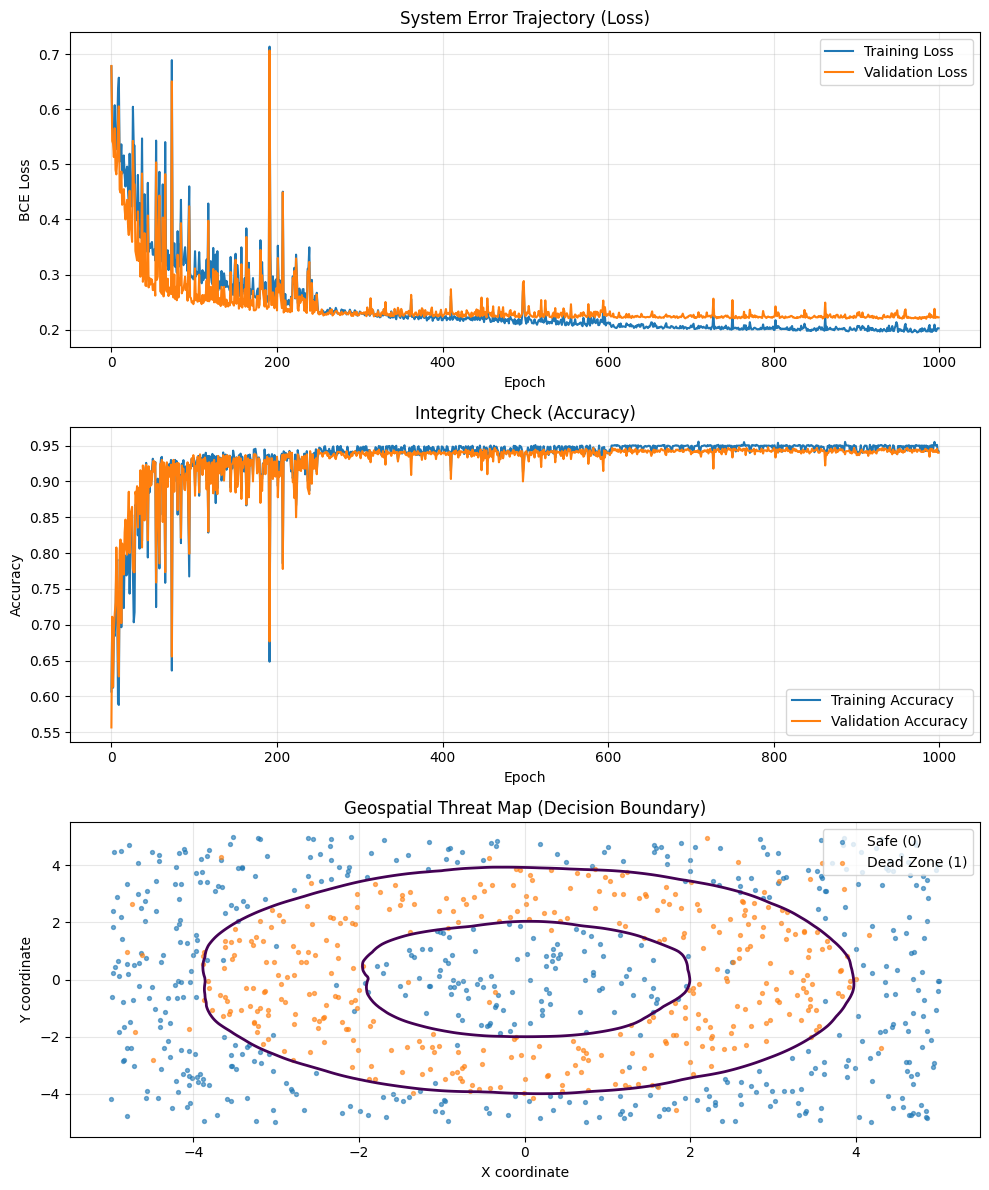

Final Train Acc: 94.17% | Final Val Acc: 94.00%


In [4]:
# ===========================================================
# PART 2: Build the Neural Filter
# ===========================================================
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device:", device)

# -------------------------
# 1) Train / Val split
# -------------------------
N = X_full.shape[0]
perm = torch.randperm(N)
train_n = int(0.70 * N)

train_idx = perm[:train_n]
val_idx   = perm[train_n:]

X_train, y_train = X_full[train_idx].to(device), y_full[train_idx].to(device)
X_val,   y_val   = X_full[val_idx].to(device),   y_full[val_idx].to(device)

# -------------------------
# 2) Data normalization
# -------------------------
mu  = X_train.mean(dim=0, keepdim=True)
std = X_train.std(dim=0, keepdim=True).clamp_min(1e-6)

X_train_n = (X_train - mu) / std
X_val_n   = (X_val   - mu) / std

# -------------------------
# 3) Feature Augmentation
#    Keeps geometry learnable but makes rings easier.
# -------------------------
USE_AUG = True
def featurize(X):
    if not USE_AUG:
        return X
    x = X[:, 0:1]
    y = X[:, 1:2]
    r2 = x*x + y*y
    xy = x*y
    return torch.cat([x, y, r2, xy], dim=1)

X_train_f = featurize(X_train_n)
X_val_f   = featurize(X_val_n)

# -------------------------
# 4) Architecture : input -> 64 -> 64 -> 64 -> 1
# -------------------------
def he_init(in_dim, out_dim, device):
    # He init for LeakyReLU
    w = torch.randn(in_dim, out_dim, device=device) * (2.0 / in_dim) ** 0.5
    b = torch.zeros(1, out_dim, device=device)
    w.requires_grad_(True)
    b.requires_grad_(True)
    return w, b

def leaky_relu(z, neg_slope=0.01):
    return torch.where(z >= 0, z, neg_slope * z)

# Setting layer sizes
in_dim = X_train_f.shape[1]
layer_sizes = [in_dim, 64, 64, 64, 1]

params = []
Ws, Bs = [], []
for i in range(len(layer_sizes) - 1):
    W, b = he_init(layer_sizes[i], layer_sizes[i+1], device)
    Ws.append(W); Bs.append(b)
    params.extend([W, b])

def forward(X):
    h = X
    for i in range(len(Ws)):
        z = h.matmul(Ws[i]) + Bs[i]
        if i < len(Ws) - 1:
            h = leaky_relu(z)          # hidden layers
        else:
            h = torch.sigmoid(z)       # output probability
    return h

# -------------------------
# 5) Manual BCE + mild regularization
# -------------------------
def bce_loss(yhat, y, eps=1e-7):
    yhat = torch.clamp(yhat, eps, 1.0 - eps)
    return -(y * torch.log(yhat) + (1.0 - y) * torch.log(1.0 - yhat)).mean()

# Weight decay helps reduce the spiky validation loss with noisy labels
L2_LAMBDA = 1e-4
def l2_penalty():
    s = 0.0
    for W in Ws:
        s = s + (W * W).mean()
    return s

def accuracy(yhat, y):
    pred = (yhat >= 0.5).float()
    return (pred.eq(y)).float().mean()

# -------------------------
# 6) Training loop (manual SGD updates)
# -------------------------
EPOCHS = 1000
BATCH_SIZE = 256

def lr_schedule(epoch):
    # simple piecewise schedule to reduce oscillations
    if epoch < 250:
        return 0.08
    elif epoch < 600:
        return 0.03
    else:
        return 0.015

train_losses, val_losses = [], []
train_accs,   val_accs   = [], []

def evaluate_full(X, y, batch_size=1024):
    with torch.no_grad():
        losses = []
        accs = []
        for i in range(0, X.shape[0], batch_size):
            xb = X[i:i+batch_size]
            yb = y[i:i+batch_size]
            yhat = forward(xb)
            loss = bce_loss(yhat, yb) + L2_LAMBDA * l2_penalty()
            losses.append(loss.item())
            accs.append(accuracy(yhat, yb).item())
        return float(np.mean(losses)), float(np.mean(accs))

for epoch in range(1, EPOCHS + 1):
    lr = lr_schedule(epoch - 1)

    # shuffling each epoch
    p = torch.randperm(X_train_f.shape[0], device=device)
    Xs = X_train_f[p]
    ys = y_train[p]

    for i in range(0, Xs.shape[0], BATCH_SIZE):
        xb = Xs[i:i+BATCH_SIZE]
        yb = ys[i:i+BATCH_SIZE]

        yhat = forward(xb)
        loss = bce_loss(yhat, yb) + L2_LAMBDA * l2_penalty()

        # backprop
        loss.backward()

        # manual SGD update
        with torch.no_grad():
            for t in params:
                t -= lr * t.grad
                t.grad.zero_()

    # log full-set metrics (less noisy than batch metrics)
    tr_loss, tr_acc = evaluate_full(X_train_f, y_train)
    va_loss, va_acc = evaluate_full(X_val_f, y_val)

    train_losses.append(tr_loss); val_losses.append(va_loss)
    train_accs.append(tr_acc);   val_accs.append(va_acc)

    if epoch % 50 == 0 or epoch == 1:
        print(f"Epoch {epoch:4d}/{EPOCHS} | Train Loss: {tr_loss:.4f} | Val Loss: {va_loss:.4f} | Train Acc: {tr_acc*100:5.2f}% | Val Acc: {va_acc*100:5.2f}%")

# ===========================================================
# PART 3: 3-Panel HUD (Loss, Accuracy, Decision Boundary)
# ===========================================================
fig = plt.figure(figsize=(10, 12))

# 1) Loss plot
ax1 = plt.subplot(3, 1, 1)
ax1.plot(train_losses, label="Training Loss")
ax1.plot(val_losses, label="Validation Loss")
ax1.set_title("System Error Trajectory (Loss)")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("BCE Loss")
ax1.grid(True, alpha=0.3)
ax1.legend()

# 2) Accuracy plot
ax2 = plt.subplot(3, 1, 2)
ax2.plot(train_accs, label="Training Accuracy")
ax2.plot(val_accs, label="Validation Accuracy")
ax2.set_title("Integrity Check (Accuracy)")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.grid(True, alpha=0.3)
ax2.legend()

# 3) Decision boundary
ax3 = plt.subplot(3, 1, 3)

# mesh grid in ORIGINAL coordinate space for interpretability
x_min, x_max = X_val[:, 0].min().item() - 0.5, X_val[:, 0].max().item() + 0.5
y_min, y_max = X_val[:, 1].min().item() - 0.5, X_val[:, 1].max().item() + 0.5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32, device=device)
grid_n = (grid - mu) / std
grid_f = featurize(grid_n)

with torch.no_grad():
    zz = forward(grid_f).reshape(xx.shape).detach().cpu().numpy()

# plotting val points
val_np = X_val.detach().cpu().numpy()
yval_np = y_val.detach().cpu().numpy().reshape(-1)

ax3.scatter(val_np[yval_np == 0, 0], val_np[yval_np == 0, 1], s=8, alpha=0.6, label="Safe (0)")
ax3.scatter(val_np[yval_np == 1, 0], val_np[yval_np == 1, 1], s=8, alpha=0.6, label="Dead Zone (1)")

# decision boundary at p=0.5
ax3.contour(xx, yy, zz, levels=[0.5], linewidths=2)
ax3.set_title("Geospatial Threat Map (Decision Boundary)")
ax3.set_xlabel("X coordinate")
ax3.set_ylabel("Y coordinate")
ax3.set_xlim(x_min, x_max)
ax3.set_ylim(y_min, y_max)
ax3.grid(True, alpha=0.3)
ax3.legend(loc="upper right")

plt.tight_layout()
plt.show()

# Final metrics
print(f"Final Train Acc: {train_accs[-1]*100:.2f}% | Final Val Acc: {val_accs[-1]*100:.2f}%")
